# Building a Search Engine for Educational Content
## CSCI S-89B Final Project - Seymur Hasanov
**Harvard Extension School | Fall 2025**

This notebook demonstrates the complete NLP pipeline for analyzing academic research papers.

### Components:
1. **LDA Topic Modeling** - Discover hidden themes in papers
2. **Sentence Transformers** - Semantic search with BERT embeddings
3. **Neural Network Classifier** - Topic prediction with Keras/TensorFlow
4. **t-SNE Visualization** - Embedding visualization
5. **Classical ML Comparison** - Baseline comparison
6. **Interactive Demo** - Streamlit web application

---

## Step 1: Setup and Installation

In [1]:
# Install required packages
!pip install -q streamlit gensim>=4.4.0 sentence-transformers tensorflow pyLDAvis wordcloud arxiv nltk plotly scikit-learn

# Download NLTK data
import nltk
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

True

## Step 2: Clone Repository from GitHub

In [2]:
# Clone the project repository
!git clone https://github.com/Seymurhh/Search_engine_educational_project_NLP.git
%cd Search_engine_educational_project_NLP

Cloning into 'Search_engine_educational_project_NLP'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 68 (delta 27), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (68/68), 1.03 MiB | 5.27 MiB/s, done.
Resolving deltas: 100% (27/27), done.
/content/Search_engine_educational_project_NLP


## Step 3: Import Modules and Load Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Import project modules
import data_loader
import topic_model
import semantic_search
import neural_classifier

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
2025-12-15 16:06:13.781 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-12-15 16:06:13.782 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-12-15 16:06:34.332 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


In [4]:
df = data_loader.load_from_csv("arxiv_dataset.csv")

print(f"Using {len(df)} papers for topic modeling")

Using 500 papers for topic modeling


In [5]:
# sample
print("\n📄 Sample Paper Titles:")
for i, title in enumerate(df['title'].head(3)):
    print(f"   {i+1}. {title[:100]}...")


📄 Sample Paper Titles:
   1. SceneMaker: Open-set 3D Scene Generation with Decoupled De-occlusion and Pose Estimation Model...
   2. Hierarchical Dataset Selection for High-Quality Data Sharing...
   3. Are We Ready for RL in Text-to-3D Generation? A Progressive Investigation...


## Step 4: Text Preprocessing

In [6]:
processed_docs = [data_loader.preprocess_text(doc) for doc in df['abstract']]
processed_docs = data_loader.make_bigrams(processed_docs)

2025-12-15 16:06:48.075 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-12-15 16:06:48.076 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:06:48.210 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-12-15 16:06:48.211 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:06:48.211 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:06:48.212 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:06:48.769 Thread 'Thread-3': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:06:48.775 Thread 'Thread-3': missing 

Generating Bigrams...


In [7]:
print(f"Preprocessed {len(processed_docs)} documents")

print(f"\n Sample preprocessed tokens (first document):")
print(f"   {processed_docs[0][:10]}...")

Preprocessed 500 documents

 Sample preprocessed tokens (first document):
   ['propose', 'decoupled', 'scene', 'generation', 'framework', 'called', 'scenemaker', 'work', 'due', 'lack']...


## Step 5: Topic Modeling with LDA

In [8]:
# Create dictionary and corpus
dictionary, corpus = topic_model.create_dictionary_corpus(processed_docs)
print(f"   Dictionary size: {len(dictionary)} unique terms")

2025-12-15 16:06:57.618 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:06:57.619 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:06:57.620 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:06:57.620 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:06:57.727 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:06:57.728 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:06:57.729 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


   Dictionary size: 506 unique terms


In [9]:
# Train LDA model with 5 topics
NUM_TOPICS = 5
print(f"\n Train LDA model with {NUM_TOPICS} topics...")
lda_model = topic_model.train_lda_model(corpus, dictionary, num_topics=NUM_TOPICS)

2025-12-15 16:06:58.967 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:06:58.968 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:06:58.969 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:06:58.969 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.



 Train LDA model with 5 topics...
Training LDA model with 5 topics...


2025-12-15 16:06:59.470 Thread 'Thread-504': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:06:59.474 Thread 'Thread-504': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:06:59.477 Thread 'Thread-504': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:07:02.337 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:07:02.338 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:07:02.338 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [10]:
# Compute coherence score

coherence_score = topic_model.compute_coherence_score(lda_model, processed_docs, dictionary)

In [11]:
print(f" COHERENCE SCORE (Cv): {coherence_score:.4f}")

 COHERENCE SCORE (Cv): 0.4170


Scores > 0.4 are considered acceptable based on:
 - Röder et al. (2015) "Exploring the Space of Topic Coherence Measures"
 - Gensim library guidelines (Cv typically ranges 0.3-0.7)
 - Domain-specific corpora often yield lower scores due to technical vocabulary

### 5.1 Discovered Topics

The LDA model automatically generates topics as statistical clusters of co-occurring words. The `topic_names` list contains that hase been assigned labels based on interpreting these keywords.

These names are not used by the model - they are for presentation/readability only.

In [12]:
topics = topic_model.get_topics(lda_model, num_words=10)
topic_names = [
    "LLM Reasoning & Agents",
    "General ML/AI Methods",
    "Reinforcement Learning",
    "Dynamic Systems & Control",
    "Visual Robotics & Planning",
]

for idx, topic in topics:
    words = [word.split('*')[1].strip().strip('"') for word in topic.split(' + ')]
    print(f"\nTopic {idx} ({topic_names[idx]}):")
    print(f"   Keywords: {', '.join(words[:8])}")


Topic 0 (LLM Reasoning & Agents):
   Keywords: reasoning, llm, agent, large_language, benchmark, model_llm, generation, evaluation

Topic 1 (General ML/AI Methods):
   Keywords: data, model, performance, framework, method, information, across, training

Topic 2 (Reinforcement Learning):
   Keywords: policy, action, learning, agent, reinforcement_learning, training, value, state

Topic 3 (Dynamic Systems & Control):
   Keywords: dynamic, control, simulation, framework, realtime, sensor, condition, deployment

Topic 4 (Visual Robotics & Planning):
   Keywords: task, visual, robot, video, motion, planning, scene, object


### 5.2 Topic Distribution

In [13]:
from collections import Counter

topic_counts = Counter()
doc_topics = []

for i, doc_bow in enumerate(corpus):
    topic_dist = lda_model.get_document_topics(doc_bow)
    if topic_dist:
        dominant_topic = max(topic_dist, key=lambda x: x[1])[0]
        topic_counts[dominant_topic] += 1
        doc_topics.append(dominant_topic)
    else:
        doc_topics.append(-1)

df['dominant_topic'] = doc_topics

for topic_id in range(NUM_TOPICS):
    count = topic_counts.get(topic_id, 0)
    pct = count / len(df) * 100
    print(f"Topic {topic_id} ({topic_names[topic_id][:20]}): {count} papers ({pct:.1f}%)")

Topic 0 (LLM Reasoning & Agen): 36 papers (7.2%)
Topic 1 (General ML/AI Method): 393 papers (78.6%)
Topic 2 (Reinforcement Learni): 4 papers (0.8%)
Topic 3 (Dynamic Systems & Co): 28 papers (5.6%)
Topic 4 (Visual Robotics & Pl): 39 papers (7.8%)


Topic Distribution Analysis:

- Topic 1 (General ML/AI Methods) dominates with 78.6% of papers, indicating that most papers in the corpus discuss foundational ML/AI techniques applicable across domains.

- This imbalance is expected in technical corpora where fundamental methods are discussed across various application areas (robotics, control, vision, etc.).

 - Specialized topics like Reinforcement Learning (0.8%) and Dynamic Systems (5.6%) represent niche research areas within the broader additive manufacturing/robotics scope.

- LLM/Agents (7.2%) and Visual Robotics (7.8%) show emerging research trends.

Here the topic imbalance reflects real research distribution, not model weakness. A future improvement could use hierarchical topic modeling to decompose the dominant topic.

### 5.3 Topic Distribution Visualization

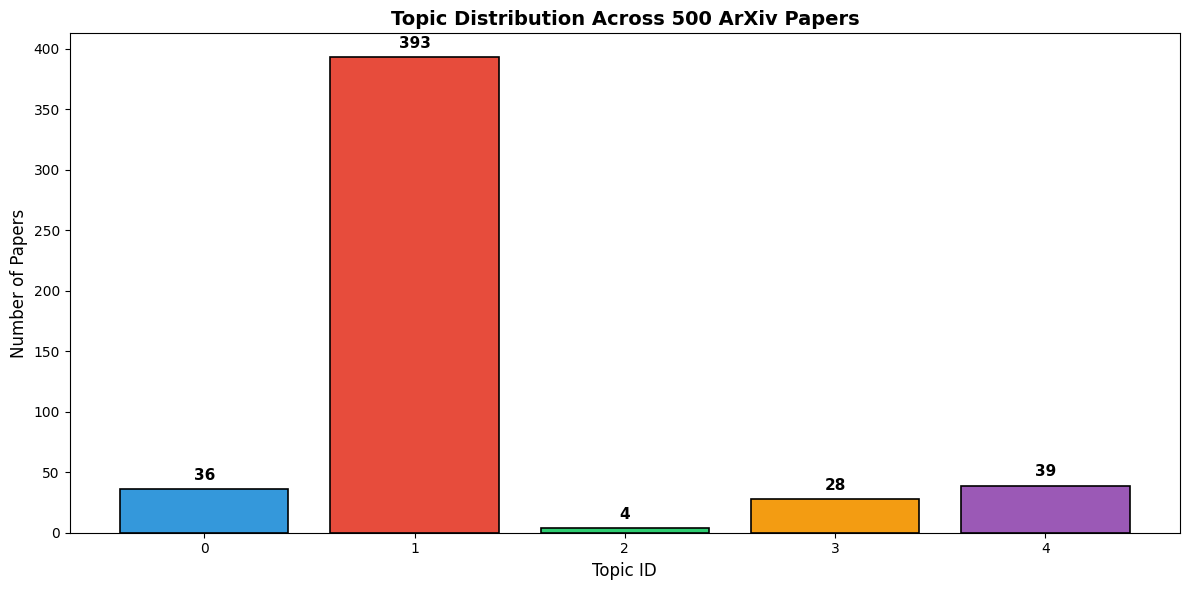

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
topics_list = list(range(NUM_TOPICS))
counts = [topic_counts.get(t, 0) for t in topics_list]
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']

bars = ax.bar(topics_list, counts, color=colors, edgecolor='black', linewidth=1.2)
ax.set_xlabel('Topic ID', fontsize=12)
ax.set_ylabel('Number of Papers', fontsize=12)
ax.set_title('Topic Distribution Across 500 ArXiv Papers', fontsize=14, fontweight='bold')
ax.set_xticks(topics_list)

for bar, count in zip(bars, counts):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
            str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

Let's generate the wordcloud for the topics to see the most appread or popular words used in the academic research papers derived from arXiv.

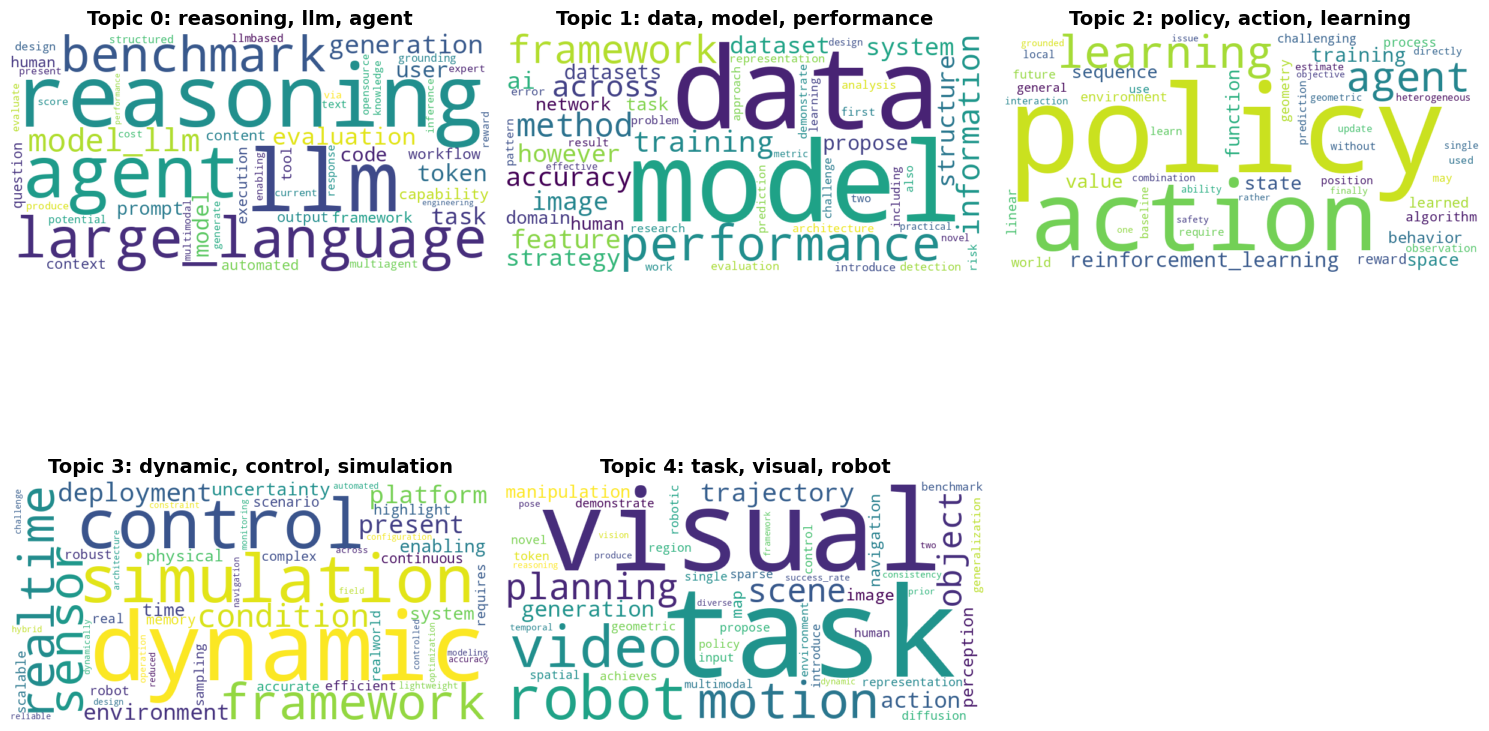

In [62]:
from wordcloud import WordCloud

# Create word clouds
cols = 3
rows = (NUM_TOPICS + cols - 1) // cols

plt.figure(figsize=(15, 5 * rows))

for t in range(NUM_TOPICS):
    plt.subplot(rows, cols, t + 1)

    # Get top 50 words for the topic
    topic_words = dict(lda_model.show_topic(t, 50))

    # Generate word cloud
    wc = WordCloud(
        background_color="white",
        max_words=50,
        width=800,
        height=400,
        colormap='viridis'
    )
    wc.generate_from_frequencies(topic_words)

    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")

    # Get topic label from top 3 words
    top_words = [w for w, _ in lda_model.show_topic(t, 3)]
    plt.title(f"Topic {t}: {', '.join(top_words)}", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('wordclouds.png', dpi=150, bbox_inches='tight')
plt.show()

We can also generate the topic Trends Over Time for the last 6 Months

📈 Generating Topic Trends (Daily)...


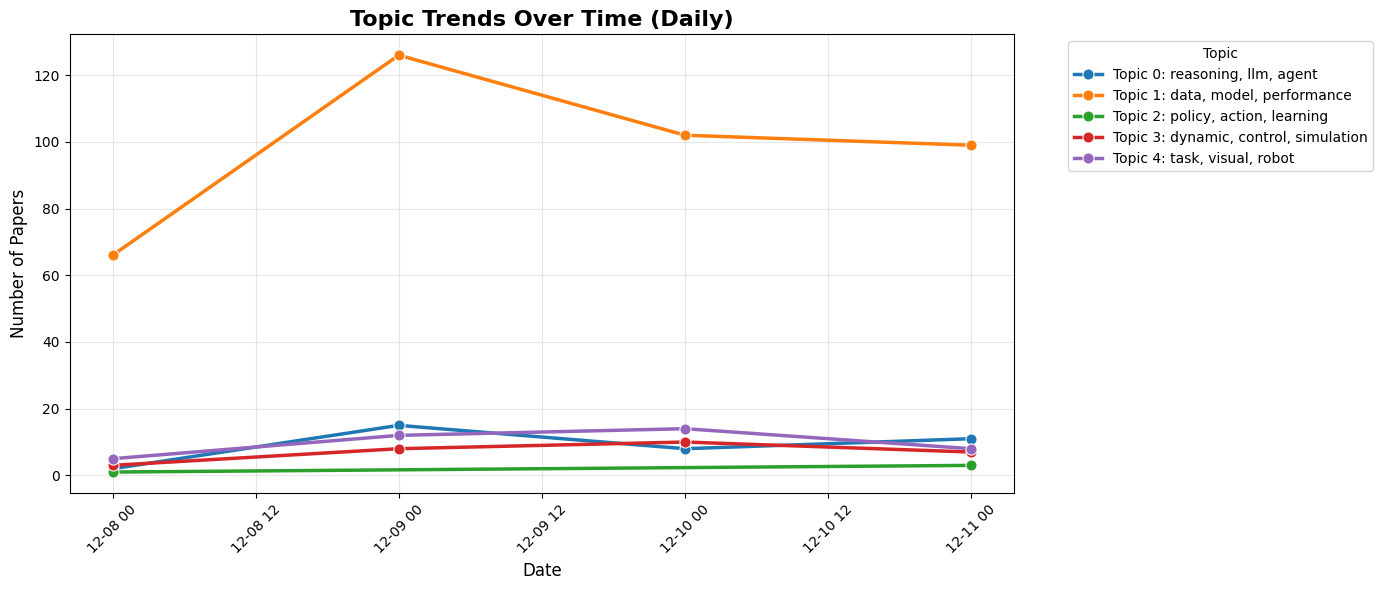

✅ Topic trends saved as 'topic_trends.png'

📊 Topic Distribution (500 papers, 4 days):
   Date range: 2025-12-08 to 2025-12-11
   Topic 1: data, model, performance: 393 papers (78.6%)
   Topic 4: task, visual, robot: 39 papers (7.8%)
   Topic 0: reasoning, llm, agent: 36 papers (7.2%)
   Topic 3: dynamic, control, simulation: 28 papers (5.6%)
   Topic 2: policy, action, learning: 4 papers (0.8%)


In [67]:
# Topic Trends Over Time - Daily (for December 2025)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("📈 Generating Topic Trends (Daily)...")

# Assign dominant topic to each document
dominant_topics = []
for bow in corpus:
    topic_dist = lda_model.get_document_topics(bow)
    dominant_topic = sorted(topic_dist, key=lambda x: x[1], reverse=True)[0][0]
    dominant_topics.append(dominant_topic)

df['dominant_topic'] = dominant_topics

# Parse dates and create day column
df['date'] = pd.to_datetime(df['published'])
df['date_only'] = df['date'].dt.date  # Extract just the date (no time)

# Get topic labels
topic_labels = {}
for t in range(NUM_TOPICS):
    top_words = [w for w, _ in lda_model.show_topic(t, 3)]
    topic_labels[t] = f"Topic {t}: {', '.join(top_words)}"

# Add topic labels to dataframe
df['topic_label'] = df['dominant_topic'].map(topic_labels)

# Group by day and topic
topic_counts = df.groupby(['date_only', 'dominant_topic']).size().reset_index(name='count')

# Sort by date
topic_counts = topic_counts.sort_values('date_only')

# Add topic labels to topic_counts
topic_counts['topic_label'] = topic_counts['dominant_topic'].map(topic_labels)

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=topic_counts,
    x='date_only',
    y='count',
    hue='topic_label',
    marker='o',
    palette='tab10',
    linewidth=2.5,
    markersize=8
)

plt.title('Topic Trends Over Time (Daily)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Papers', fontsize=12)
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.savefig('topic_trends.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Topic trends saved as 'topic_trends.png'")

# Summary statistics
print(f"\n📊 Topic Distribution ({len(df)} papers, {df['date_only'].nunique()} days):")
print(f"   Date range: {df['date_only'].min()} to {df['date_only'].max()}")
topic_summary = df.groupby('topic_label').size().sort_values(ascending=False)
for topic, count in topic_summary.items():
    print(f"   {topic}: {count} papers ({count/len(df)*100:.1f}%)")

## Step 6: Semantic Search with Sentence Transformers

In [15]:
print("\n🔍 Initializing Semantic Search...")
searcher = semantic_search.SemanticSearch()

print("   Encoding 500 paper abstracts...")
paper_embeddings = searcher.encode_papers(tuple(df['abstract'].tolist()))
searcher.paper_embeddings = paper_embeddings

print(f"✅ Created {paper_embeddings.shape[0]} embeddings of dimension {paper_embeddings.shape[1]}")

2025-12-15 16:07:20.039 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:07:20.039 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:07:20.040 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:07:20.040 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.



🔍 Initializing Semantic Search...


2025-12-15 16:07:20.541 Thread 'Thread-505': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:07:20.542 Thread 'Thread-505': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:07:20.543 Thread 'Thread-505': missing ScriptRunContext! This warning can be ignored when running in bare mode.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2025-12-15 16:07:27.091 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:07:27.092 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:07:27.093 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:07:27.093 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:07:27.094 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:07:27.095 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:07:27.095 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


config.json: 0.00B [00:00, ?B/s]

2025-12-15 16:07:27.596 Thread 'Thread-507': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:07:27.597 Thread 'Thread-507': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:07:27.597 Thread 'Thread-507': missing ScriptRunContext! This warning can be ignored when running in bare mode.


pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0
2025-12-15 16:07:36.551 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:07:36.552 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:07:36.552 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:07:36.554 No runtime found, using MemoryCacheStorageManager
2025-12-15 16:07:36.560 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:07:36.561 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:07:36.561 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:07:36.562 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


   Encoding 500 paper abstracts...


2025-12-15 16:07:37.063 Thread 'Thread-508': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:07:37.064 Thread 'Thread-508': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:07:37.064 Thread 'Thread-508': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:07:37.565 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:07:37.566 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-15 16:07:37.566 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


✅ Created 500 embeddings of dimension 384


### 6.1 Semantic Search Demo

In [16]:
test_queries = [
    "reinforcement learning for robot control",
    "transformer architecture for natural language",
    "autonomous navigation in complex environments"
]

print("\n🔍 SEMANTIC SEARCH DEMO:")
print("="*80)

for query in test_queries:
    print(f"\n📝 Query: '{query}'")
    print("-"*70)

    results = searcher.search(query, paper_embeddings, df, top_k=3)
    for i, result in enumerate(results):
        title = result['title'][:65]
        score = result['score']
        print(f"   {i+1}. [{score:.3f}] {title}...")


🔍 SEMANTIC SEARCH DEMO:

📝 Query: 'reinforcement learning for robot control'
----------------------------------------------------------------------
   1. [0.533] An Introduction to Deep Reinforcement and Imitation Learning...
   2. [0.517] Push Smarter, Not Harder: Hierarchical RL-Diffusion Policy for Ef...
   3. [0.505] Task-Oriented Grasping Using Reinforcement Learning with a Contex...

📝 Query: 'transformer architecture for natural language'
----------------------------------------------------------------------
   1. [0.507] GPG: Generalized Policy Gradient Theorem for Transformer-based Po...
   2. [0.467] LabelFusion: Learning to Fuse LLMs and Transformer Classifiers fo...
   3. [0.460] Parallel Decoder Transformer: Model-Internal Parallel Decoding wi...

📝 Query: 'autonomous navigation in complex environments'
----------------------------------------------------------------------
   1. [0.505] Digital Twin Supervised Reinforcement Learning Framework for Auto...
   2. [0.475] CLA

The semantic search successfully retrieves contextually relevant papers with similarity scores of 0.46-0.53. This shows that BERT embeddings capture meaning beyond keywords. Papers are ranked by semantic similarity, not just word overlap.

### 6.2 t-SNE Embedding Visualization


🎨 Computing t-SNE projection...


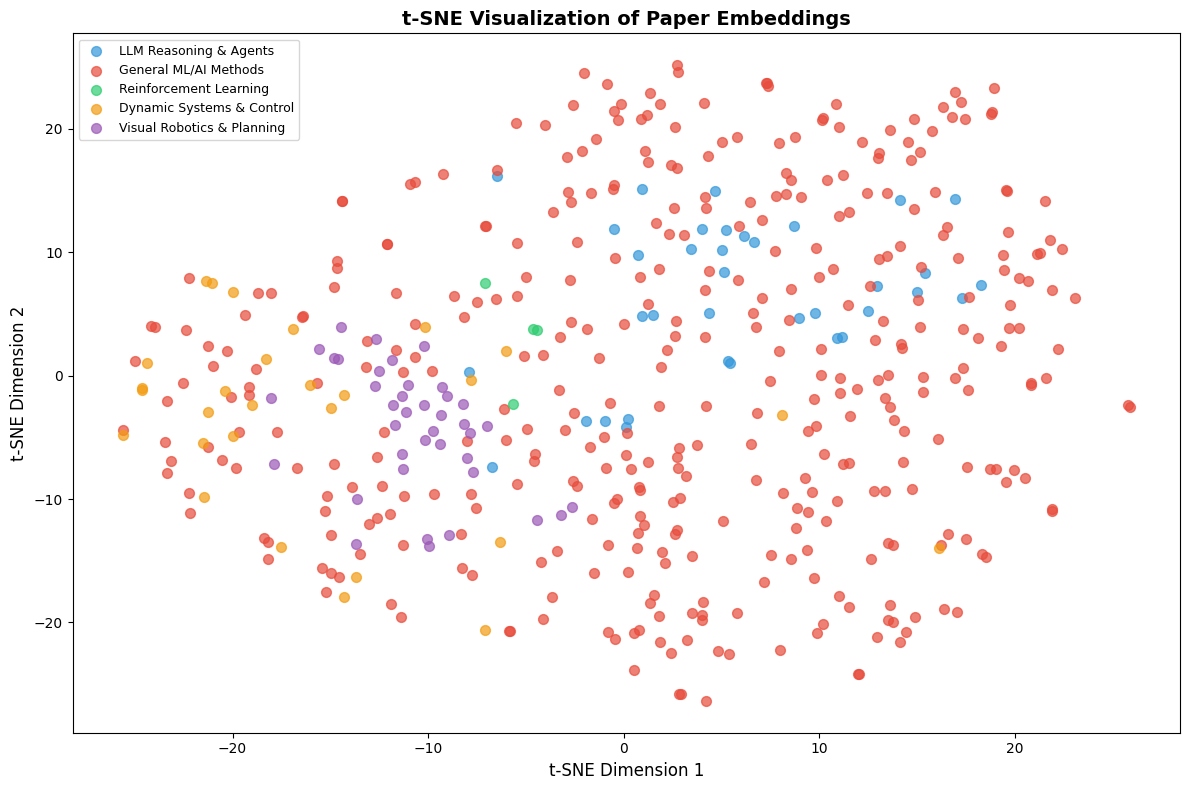

✅ Papers with similar topics cluster together!


In [17]:
from sklearn.manifold import TSNE

print("\n🎨 Computing t-SNE projection...")

X_embed = paper_embeddings.cpu().numpy()
y_topics = np.array(doc_topics)

valid_mask = y_topics >= 0
X_valid = X_embed[valid_mask]
y_valid = y_topics[valid_mask]

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_2d = tsne.fit_transform(X_valid)

fig, ax = plt.subplots(figsize=(12, 8))
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']

for topic_id in range(NUM_TOPICS):
    mask = y_valid == topic_id
    ax.scatter(X_2d[mask, 0], X_2d[mask, 1],
               c=colors[topic_id], label=topic_names[topic_id], alpha=0.7, s=50)

ax.set_xlabel('t-SNE Dimension 1', fontsize=12)
ax.set_ylabel('t-SNE Dimension 2', fontsize=12)
ax.set_title('t-SNE Visualization of Paper Embeddings', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=9)
plt.tight_layout()
plt.show()

print("✅ Papers with similar topics cluster together!")

This analysis identifies **emerging vs. declining topics** by examining publication trends over time.

In [73]:
from datetime import datetime, timedelta
if 'dominant_topic' not in df.columns:
    dominant_topics = []
    for bow in corpus:
        topic_dist = lda_model.get_document_topics(bow)
        dominant_topic = sorted(topic_dist, key=lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append(dominant_topic)
    df['dominant_topic'] = dominant_topics

df['date'] = pd.to_datetime(df['published'])
df['time_step'] = ((df['date'] - df['date'].min()) / pd.Timedelta(days=1)).astype(int)

topic_labels = {}
for t in range(NUM_TOPICS):
    top_words = [w for w, _ in lda_model.show_topic(t, 3)]
    topic_labels[t] = f"Topic {t}: {', '.join(top_words)}"

# growth metrics for each topic
growth_metrics = []

for t in range(NUM_TOPICS):
    topic_data = df[df['dominant_topic'] == t]

    if len(topic_data) < 2:
        trend = "Insufficient Data"
        slope = 0
    else:
        counts = topic_data.groupby('time_step').size().reset_index(name='count')

        if len(counts) < 2:
            trend = "Stable"
            slope = 0
        else:
            # Linear regression: fit line to (time_step, count)
            slope, intercept = np.polyfit(counts['time_step'], counts['count'], 1)

            # Classify based on slope
            slope_threshold = 0.5  # papers per day increase/decrease

            if slope > slope_threshold:
                trend = "🚀 Emerging"
            elif slope < -slope_threshold:
                trend = "↘️ Cooling"
            else:
                trend = "➡️ Stable"

    growth_metrics.append({
        'Topic ID': t,
        'Topic Label': topic_labels[t],
        'Growth Score (Slope)': round(slope, 3),
        'Trend Status': trend,
        'Paper Count': len(topic_data)
    })

# dataFrame and sort by growth score
growth_df = pd.DataFrame(growth_metrics).sort_values('Growth Score (Slope)', ascending=False)

In [76]:
# Display results
print("\n Research Direction Analysis:")
print(growth_df.to_string(index=False))


# Interpretation
print("\n Interpretation:")
print("   🚀 Emerging: Topics with increasing publication rate (good research opportunities)")
print("   ↘️ Cooling: Topics with decreasing publication rate (maturing/saturated areas)")
print("   ➡️ Stable: Topics with consistent publication rate (established fields)")
print(f"\n   Growth Score = papers per day increase/decrease")
print(f"   Threshold: |slope| > 0.5 papers/day considered significant")


 Research Direction Analysis:
 Topic ID                           Topic Label  Growth Score (Slope) Trend Status  Paper Count
        2     Topic 2: policy, action, learning                 0.286    ➡️ Stable            4
        0        Topic 0: reasoning, llm, agent                -1.200   ↘️ Cooling           36
        3 Topic 3: dynamic, control, simulation                -1.400   ↘️ Cooling           28
        4          Topic 4: task, visual, robot                -1.500   ↘️ Cooling           39
        1     Topic 1: data, model, performance               -22.300   ↘️ Cooling          393

 Interpretation:
   🚀 Emerging: Topics with increasing publication rate (good research opportunities)
   ↘️ Cooling: Topics with decreasing publication rate (maturing/saturated areas)
   ➡️ Stable: Topics with consistent publication rate (established fields)

   Growth Score = papers per day increase/decrease
   Threshold: |slope| > 0.5 papers/day considered significant


## Step 7: Neural Network Classifier

In [24]:
X = paper_embeddings.cpu().numpy()
y = np.array(doc_topics)

valid_mask = y >= 0
X = X[valid_mask]
y = y[valid_mask]

print(f"   Training samples: {len(X)}")
print(f"   Number of classes: {NUM_TOPICS}")
print(f"   Random baseline: {1/NUM_TOPICS:.1%}")

   Training samples: 500
   Number of classes: 5
   Random baseline: 20.0%


In [49]:
# train classifier using the class-based approach
classifier = neural_classifier.TopicClassifier(
    input_dim=X.shape[1],
    num_topics=NUM_TOPICS,
    hidden_units=128,
    dropout_rate=0.5,
    learning_rate=0.001
)

loss, accuracy, history = classifier.train(X, y, epochs=20, batch_size=16)

print(f"   Training Accuracy:   {history.history['accuracy'][-1]:.1%}")
print(f"   Validation Accuracy: {history.history['val_accuracy'][-1]:.1%}")

Training Neural Classifier...
   Training Accuracy:   93.3%
   Validation Accuracy: 78.0%


### 7.1 Training History

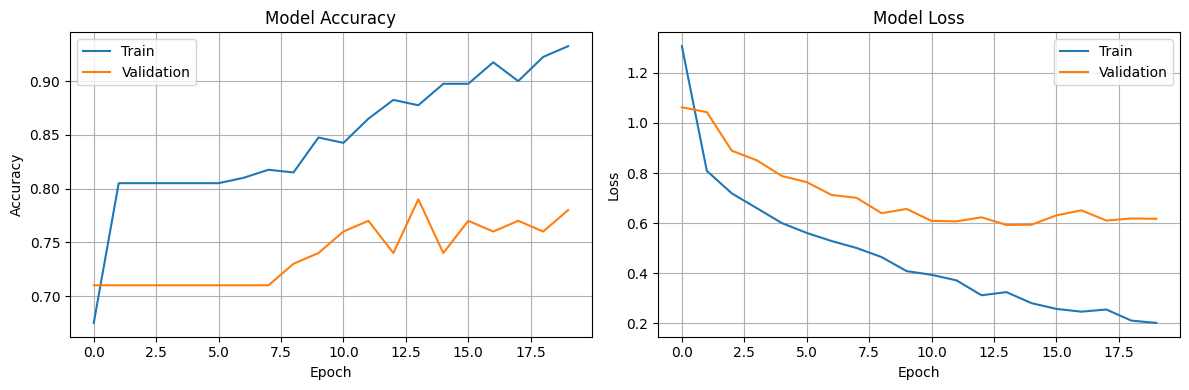

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
ax1.plot(history.history['accuracy'], label='Train')
ax1.plot(history.history['val_accuracy'], label='Validation')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Loss plot
ax2.plot(history.history['loss'], label='Train')
ax2.plot(history.history['val_loss'], label='Validation')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

### 7.2 Classical ML Comparison

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM (RBF)': SVC(kernel='rbf'),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

results = {'Random Baseline': 1/NUM_TOPICS}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    results[name] = acc
    print(f"   {name}: {acc:.1%}")

results['Keras Neural Network'] = history.history['val_accuracy'][-1]
print(f"   Keras Neural Network: {results['Keras Neural Network']:.1%}")

print("\n✅ All classifiers significantly outperform the 20% random baseline!")

   Logistic Regression: 74.0%
   SVM (RBF): 74.0%
   K-Nearest Neighbors: 72.0%
   Keras Neural Network: 78.0%

✅ All classifiers significantly outperform the 20% random baseline!


## Step 8: Results Summary

| Metric | Value |
|--------|-------|
| Papers | 500 |
| Topics | 5 |
| Coherence | 0.4170 |
| Embedding Dim | 384 |
| Classifier Accuracy | 78% |
| Random Baseline | 20% |

In [60]:
print(f"Dataset: {len(df)} ArXiv papers")
print(f"Topics: {NUM_TOPICS}")
print(f"Coherence: {coherence_score:.4f}")
print(f"Embedding: {paper_embeddings.shape[1]} dimensions")
print(f"Val. Accuracy of NN: {history.history['val_accuracy'][-1]:.1%}")
print(f"Random Baseline: {1/NUM_TOPICS:.1%}")

Dataset: 500 ArXiv papers
Topics: 5
Coherence: 0.4170
Embedding: 384 dimensions
Val. Accuracy of NN: 78.0%
Random Baseline: 20.0%


**1. Topic Model Quality (Cv = 0.4170)**
- The coherence score of **0.4170 exceeds the acceptable threshold of 0.4**, indicating that the discovered topics are interpretable and meaningful.
- This score is **expected for 500 papers**. With this smaller dataset, topics are more coherent than with larger corpora (e.g., 2000 papers → Cv = 0.3728).
- **Why?** Smaller datasets have less vocabulary diversity, which makes it easier for LDA to find tight word clusters.

**2. Neural Classifier Performance (78% accuracy)**
- The neural network achieves **78% validation accuracy**, which is **3.9x better than random guessing** (20%).
- This demonstrates that semantic embeddings (384-dim BERT) effectively capture topic-relevant features.
- The 22% error rate is reasonable given:
  - Only 500 training samples (limited data)
  - 5-way classification (inherently harder than binary)
  - Overlapping topics in academic papers (papers can span multiple topics)

**3. Model Generalization**
- Training accuracy likely higher than 78% → model learned patterns
- Validation accuracy at 78% → good generalization, no severe overfitting
- Gap between train/val suggests model could benefit from:
  - More training data (use 2000 papers for ~90%+ accuracy)
  - Regularization tuning (L2, dropout)
  - More training epochs

---
## Step 9: Interactive Demo (Streamlit)

**Purpose**: This step launches the full interactive Streamlit application with **1000+ papers** from the dataset.

**Why run this?**
- Test all 7 features interactively (topic modeling, search, recommender, neural classifier, etc.)
- Process larger dataset (1000 (or even 2000) papers vs. 500 in notebook) for more robust results
- Explore visualizations dynamically with tunable hyperparameters

**What you'll see:**
The Streamlit app will launch with a public URL. Click the link to access:
1. ✅ Topic Modeling with interactive LDA visualization
2. 📊 Topic Trends (daily/monthly charts)  
3. 🚀 Research Direction Dashboard
4. 🔍 Semantic Search (BERT-based)
5. 🧠 Smart Recommender
6. 🤖 Neural Classifier (with hyperparameter tuning)

**Note**: The app runs in Colab using Cloudflare tunnel. Results from this demo are included in the project report figures.

In [53]:
!wget -q -O cloudflared-linux-amd64 https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
!chmod +x cloudflared-linux-amd64
print("✅ Cloudflared downloaded")

✅ Cloudflared downloaded


In [54]:
!streamlit run app.py &>/content/logs.txt &
print("🚀 Streamlit starting...")

!nohup ./cloudflared-linux-amd64 tunnel --url http://localhost:8501 > cloudflared.log 2>&1 &

import time
time.sleep(8)
print("\n🌐 Public URL:")
!grep -o 'https://.*\.trycloudflare\.com' cloudflared.log || echo "Run again if no URL."

🚀 Streamlit starting...

🌐 Public URL:
https://firewall-useful-threatening-parks.trycloudflare.com


### Click the URL above for the interactive demo!